# Spain Covid Cases

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
spanish_cases = "local_files/covid19.isciii.es__serie_historica_acumulados.csv"
#url_counties = "https://opendata.arcgis.com/datasets/917fc37a709542548cc3be077a786c17_0.csv"

In [3]:
cases = pd.read_csv(spanish_cases, engine="python")
#counties = pd.read_csv(url_counties)

In [4]:
# Rename columns 
cases.rename(columns={'CCAA Codigo ISO': 'ISO code adm. region',
                      'Fecha': 'Date',
                      'Casos ': 'Cases',
                      'Hospitalizados': 'Hospitalized',
                      'UCI': 'ICU',
                      'Fallecidos': 'Deceases'}, inplace=True)

In [5]:
# Convert dates to datetime objects
cases['Date'] = pd.to_datetime(cases.Date, dayfirst=True)

In [6]:
# Choose a region, e.g. Andalucia == AN
cases_Andalucia = cases[cases["ISO code adm. region"] == "AN"]

In [7]:
deaths_Andalucia = cases_Andalucia["Deceases"].values

# Apparently this is the cumulative sum

<IPython.core.display.Javascript object>


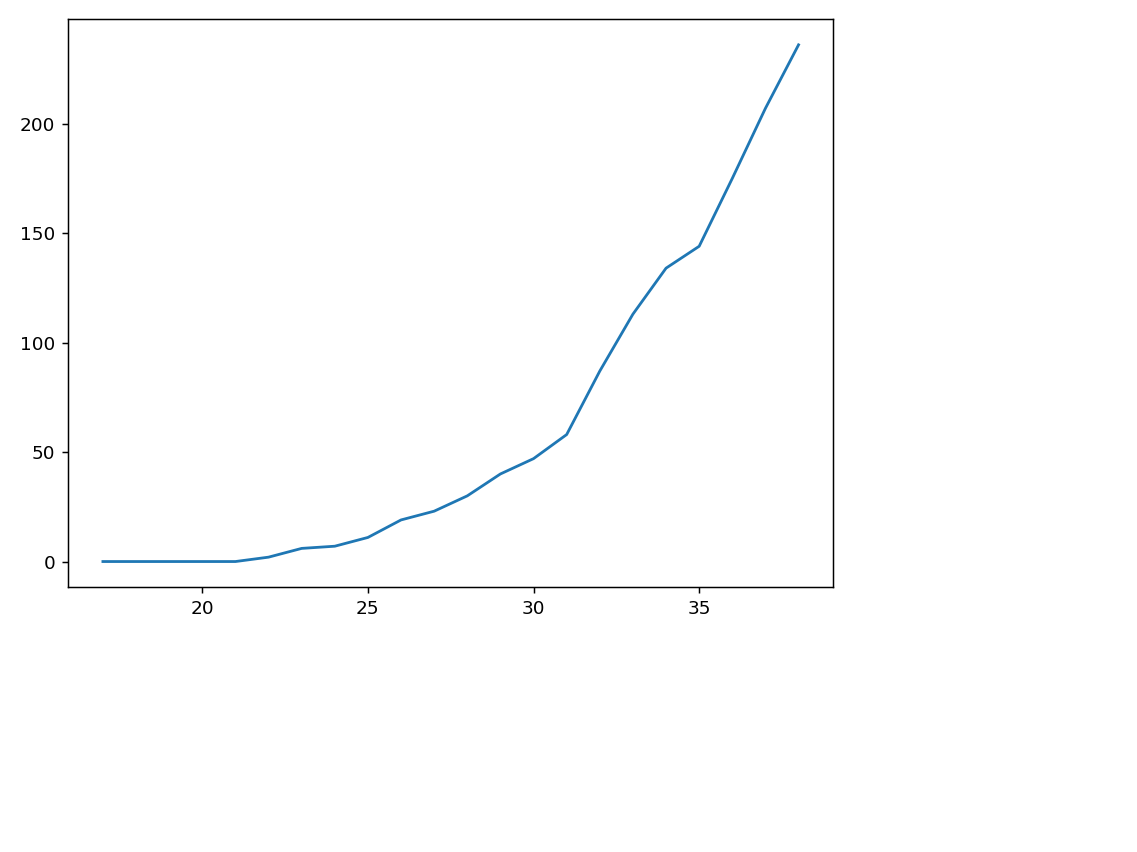

In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(deaths_Andalucia)
plt.tight_layout();

In [9]:
cases_Andalucia_daily = cases_Andalucia.sort_values("Date").groupby(["Date"])["Deceases"].sum()

<IPython.core.display.Javascript object>


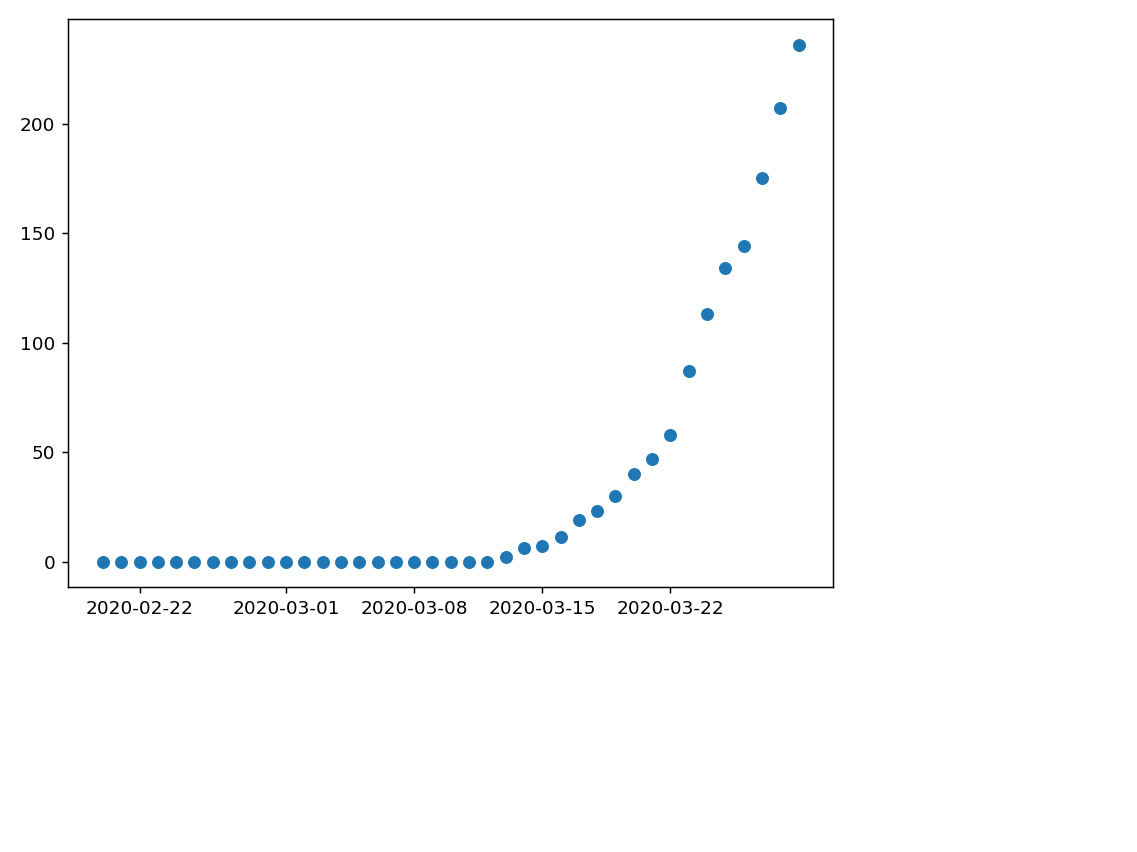

In [15]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.plot(cases_Andalucia_daily, 'o')
# to make the tick on x plot more sparse
#plt.xticks(range(cases_Andalucia_daily.shape[0])[::3],
#           [str(x) for x in cases_Andalucia_daily.index.tolist()][::3],
#           rotation = 45)
fig.tight_layout();

In [ ]:
counties_hamburg_cases = counties_hamburg["cases"].values[0]
cases_hamburg_sum = sum(cases_hamburg["AnzahlFall"])

if counties_hamburg_cases != cases_hamburg_sum:
    print("Warning, inconsistent case numbers!")
    print(f"Reported total cases in Hamburg {counties_hamburg_cases}, sum of cases {cases_hamburg_sum}")